In [ ]:
#Initializing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
os.getcwd()

'/content'

IMPORTING DATA

In [ ]:
#Importing Data
data=pd.read_csv("/content/train_Df64byy.csv")

In [ ]:
#dataset
data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [ ]:
#Checking data size
data.shape

(50882, 14)

In [ ]:
#Removing  ID ,#Dropping ID since its not needed
noid=data.drop("ID",axis=1)

In [ ]:
noid

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [ ]:
noid["Accomodation_Type"].unique()

array(['Rented', 'Owned'], dtype=object)

In [ ]:
noid["Reco_Insurance_Type"].unique()

array(['Individual', 'Joint'], dtype=object)

In [ ]:
noid["Is_Spouse"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
noid["Health Indicator"].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [ ]:
noid["Health Indicator"]=pd.DataFrame(noid["Health Indicator"].replace("nan",np.NaN))

In [ ]:
noid["Holding_Policy_Duration"].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [ ]:
#total number of values for each city code
noid["City_Code"].value_counts()

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64

FINDING AND IMPUTING MISSING VALUES

In [ ]:
#Finding missing values
noid.isna().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
len((noid))

50882

In [ ]:
#percentage of missing values in  HEalth Indicator
(11691/50882)*100

22.97669116780001

In [ ]:
#Percentage of missing values in Holding policy duration and holding policy type
(20251/50882)*100


39.799929248064146

In [ ]:
#Unique values in  Holding policy type
noid["Holding_Policy_Type"].unique()

array([ 3., nan,  1.,  4.,  2.])

In [ ]:
#Filling holding policy type using mean and rounding it off so that it can be part of the rounded category
noid["Holding_Policy_Type"]=noid["Holding_Policy_Type"].fillna(2)


In [ ]:
noid["Holding_Policy_Type"]

0        3.0
1        2.0
2        1.0
3        3.0
4        1.0
        ... 
50877    2.0
50878    3.0
50879    1.0
50880    2.0
50881    3.0
Name: Holding_Policy_Type, Length: 50882, dtype: float64

In [ ]:
#We can remove Holding policy duration since 14+ cannot be predicted and has got many age groups above it
noid=noid.drop(["Holding_Policy_Duration"],axis=1)

In [ ]:
#dropping city code
citydrop=noid.drop("City_Code",axis=1)

In [ ]:
citydrop.columns

Index(['Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age',
       'Lower_Age', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [ ]:
citydrop.groupby('Health Indicator').size()

Health Indicator
X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
dtype: int64

In [ ]:
#imputing missing values in Health Indicator with mode manually
citydrop['Health Indicator'] = citydrop['Health Indicator'].fillna("X1")


In [ ]:
#NO more missing values
citydrop.isna().sum()

Region_Code            0
Accomodation_Type      0
Reco_Insurance_Type    0
Upper_Age              0
Lower_Age              0
Is_Spouse              0
Health Indicator       0
Holding_Policy_Type    0
Reco_Policy_Cat        0
Reco_Policy_Premium    0
Response               0
dtype: int64

ONE HOT ENCODING AND LABEL ENCODING and dummy variable creation


In [ ]:
citydrop

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,3213,Rented,Individual,36,36,No,X1,3.0,22,11628.0,0
1,1117,Owned,Joint,75,22,No,X2,2.0,22,30510.0,0
2,3732,Owned,Individual,32,32,No,X1,1.0,19,7450.0,1
3,4378,Owned,Joint,52,48,No,X1,3.0,19,17780.0,0
4,2190,Rented,Individual,44,44,No,X2,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...
50877,845,Rented,Individual,22,22,No,X3,2.0,18,7704.0,0
50878,4188,Rented,Individual,27,27,No,X3,3.0,4,5408.0,0
50879,442,Rented,Individual,63,63,No,X2,1.0,12,11374.0,0
50880,4,Owned,Joint,71,49,No,X2,2.0,16,28179.2,1


In [ ]:
#label encoding on Accomodation_Type,Reco_Insurance_Type,Is_Spouse
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
citydrop['Reco_Insurance_Type']=le.fit_transform(citydrop['Reco_Insurance_Type'])

In [ ]:
citydrop#label encoding on Accomodation_Type,Reco_Insurance_Type,Is_Spouse
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
citydrop['Accomodation_Type']=le.fit_transform(citydrop['Accomodation_Type'])

In [ ]:
#label encoding on Accomodation_Type,Reco_Insurance_Type,Is_Spouse
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
citydrop['Is_Spouse']=le.fit_transform(citydrop['Is_Spouse'])

In [ ]:
#Creating dummies for Health Indiacator since its categorical
dummied=pd.get_dummies(citydrop,columns=['Health Indicator'])

In [ ]:
#removing first variable of encoded variables for dummy trap
dummydrop=dummied.drop(['Health Indicator_X1'],axis=1)

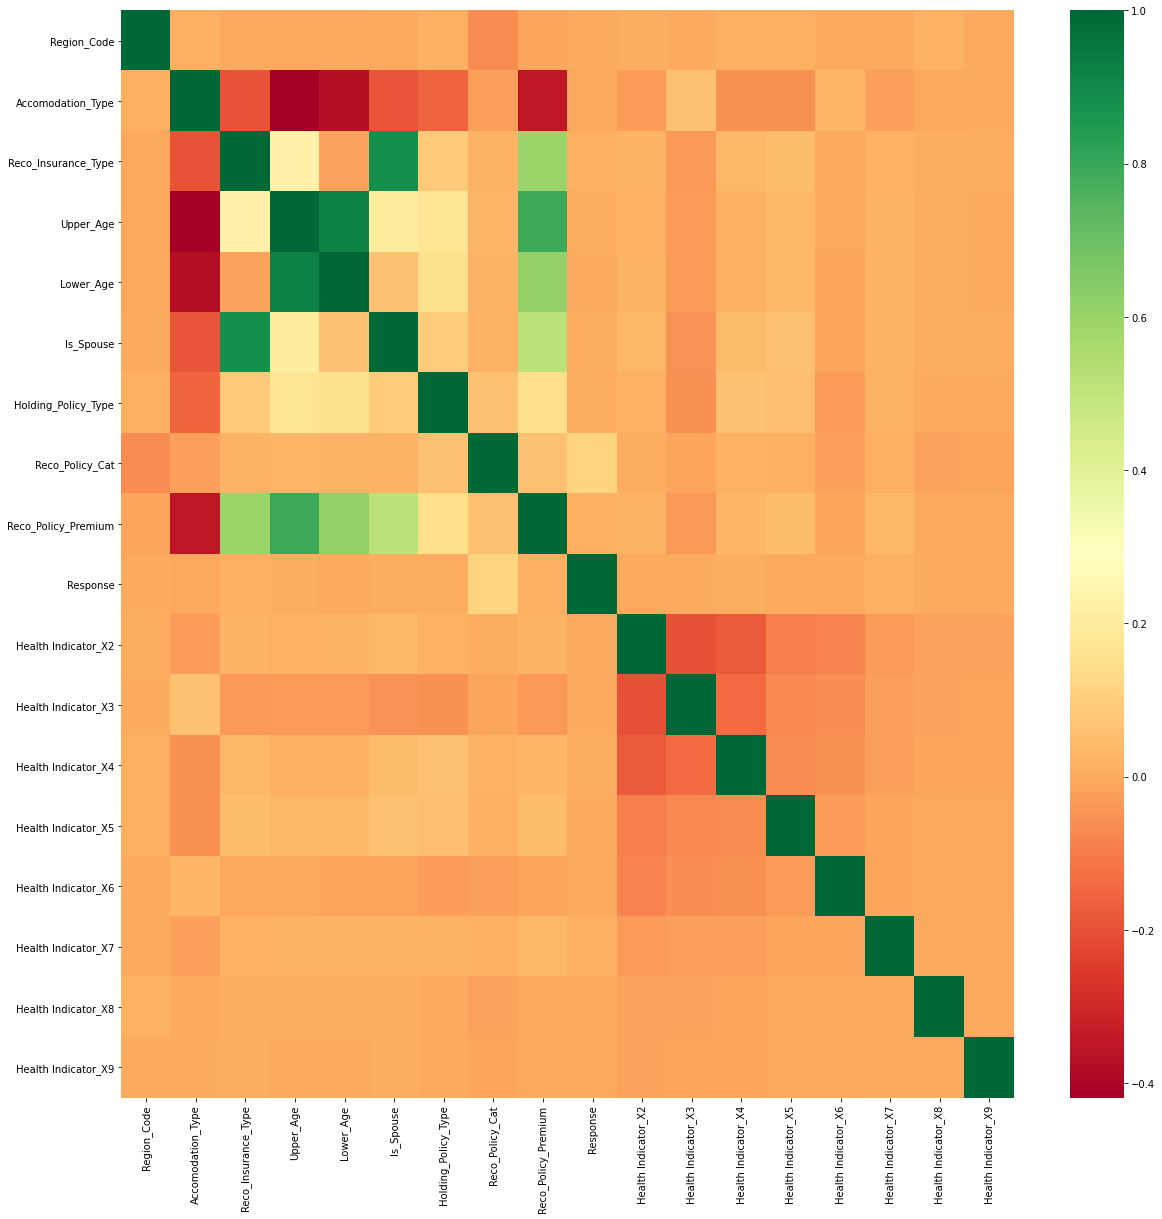

In [ ]:
#checking correlation using heatmap

plt.subplots(figsize=(20,20)) 
sns.heatmap(dummydrop.corr(),cmap='RdYlGn')

In [ ]:
dummydrop=pd.get_dummies(dummydrop,columns=['Holding_Policy_Type'],drop_first=True)

In [ ]:
dummydrop

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,Response,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0
0,3213,1,0,36,36,0,22,11628.0,0,0,0,0,0,0,0,0,0,0,1,0
1,1117,0,1,75,22,0,22,30510.0,0,1,0,0,0,0,0,0,0,1,0,0
2,3732,0,0,32,32,0,19,7450.0,1,0,0,0,0,0,0,0,0,0,0,0
3,4378,0,1,52,48,0,19,17780.0,0,0,0,0,0,0,0,0,0,0,1,0
4,2190,1,0,44,44,0,16,10404.0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,845,1,0,22,22,0,18,7704.0,0,0,1,0,0,0,0,0,0,1,0,0
50878,4188,1,0,27,27,0,4,5408.0,0,0,1,0,0,0,0,0,0,0,1,0
50879,442,1,0,63,63,0,12,11374.0,0,1,0,0,0,0,0,0,0,0,0,0
50880,4,0,1,71,49,0,16,28179.2,1,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Finding outliers and removing them

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


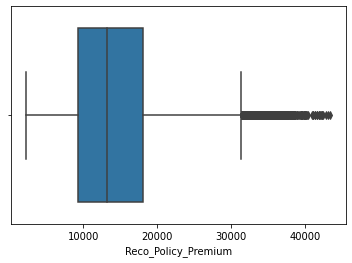

In [ ]:
sns.boxplot(dummydrop['Reco_Policy_Premium'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


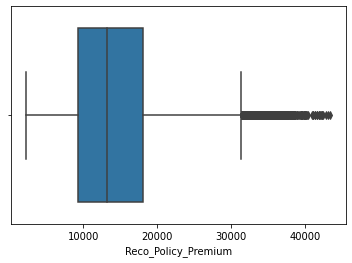

In [ ]:
sns.boxplot(dummydrop['Reco_Policy_Premium'])

In [ ]:
Q1=dummydrop['Reco_Policy_Premium'].quantile(0.25)
Q3=dummydrop['Reco_Policy_Premium'].quantile(0.75)

In [ ]:
IQR=Q3-Q1
IQR

8848.0

In [ ]:
lowerlim=Q1*1.5-IQR
upperlim=Q3*1.5+IQR

lowerlim,upperlim

(5024.0, 35992.0)

In [ ]:
noout=dummydrop[(dummydrop.Reco_Policy_Premium>lowerlim)&(dummydrop.Reco_Policy_Premium<upperlim)]

In [ ]:
noout.shape

(48606, 20)

In [ ]:
noout.columns

Index(['Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age',
       'Lower_Age', 'Is_Spouse', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response', 'Health Indicator_X2', 'Health Indicator_X3',
       'Health Indicator_X4', 'Health Indicator_X5', 'Health Indicator_X6',
       'Health Indicator_X7', 'Health Indicator_X8', 'Health Indicator_X9',
       'Holding_Policy_Type_2.0', 'Holding_Policy_Type_3.0',
       'Holding_Policy_Type_4.0'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


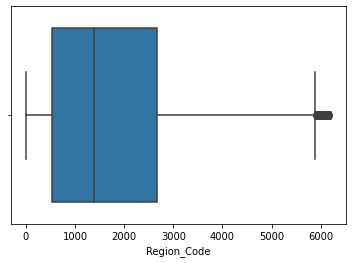

In [ ]:
sns.boxplot(noout['Region_Code'])

In [ ]:
areaQ1=dummydrop['Region_Code'].quantile(0.25)
areaQ3=dummydrop['Region_Code'].quantile(0.75)

In [ ]:
areaIQR=Q3-Q1
areaIQR

8848.0

In [ ]:
arealowerlim=Q1*1.5-IQR
areaupperlim=Q3*1.5+IQR

arealowerlim,areaupperlim

(5024.0, 35992.0)

In [ ]:
areaout=noout[(noout.Region_Code>arealowerlim)&(noout.Region_Code<areaupperlim)]

In [ ]:
#assigning X and Y values
x=areaout.drop(columns=["Response"])
y=pd.DataFrame(areaout["Response"])

In [ ]:
xtrain=x
ytrain=y


In [ ]:
#Implementing AdaBoost model with decision tree as base learner

In [ ]:
#using xgboost classifier
import xgboost
adb=xgboost.XGBClassifier(n_estimators=2000)

In [ ]:
adb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=4000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Fitting the model on train dataset
adb.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=4000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
adpredict=adb.predict(xtrain)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(adpredict,ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       873
           1       1.00      1.00      1.00       279

    accuracy                           1.00      1152
   macro avg       1.00      1.00      1.00      1152
weighted avg       1.00      1.00      1.00      1152



In [ ]:
#Roc_AUC_SCORE
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain,adpredict)

1.0

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(adpredict,ytrain)

1.0

In [ ]:
#roc_curve
from sklearn.metrics import roc_curve
no= [0 for _ in range(len(ytrain))]
fpr, tpr, _ = roc_curve(ytrain, adpredict)
nofpr, notpr, _ = roc_curve(ytrain, no)


Text(0, 0.5, 'True Positive Rate')

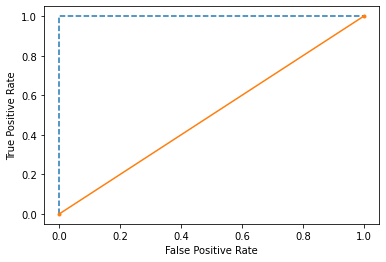

In [ ]:
#plotting ROC curve
plt.plot(fpr, tpr, linestyle='--')
plt.plot(nofpr, notpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
#TEST DATA STARTS HERE

In [ ]:
testdata=pd.read_csv("/content/test_YCcRUnU.csv")

In [ ]:
testdata

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


In [ ]:
tnoid=testdata

In [ ]:
#In Health Indicator ,replacing missing nan with np.NaN
tnoid["Health Indicator"]=pd.DataFrame(tnoid["Health Indicator"].replace("nan",np.NaN))

In [ ]:
#Finding missing values
tnoid.isna().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [ ]:
tnoid["Holding_Policy_Type"]=tnoid["Holding_Policy_Type"].fillna(2)


In [ ]:
#We can remove Holding policy duration since 14+ cannot be predicted and has got many age groups above it
tnoid=tnoid.drop(["Holding_Policy_Duration"],axis=1)

In [ ]:
#dropping city code
tcitydrop=tnoid.drop("City_Code",axis=1)

In [ ]:
#imputing missing values in Health Indicator with mode manually
tcitydrop['Health Indicator'] = tcitydrop['Health Indicator'].fillna("X1")

In [ ]:
#label encoding on Accomodation_Type,Reco_Insurance_Type,Is_Spouse
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
tcitydrop['Reco_Insurance_Type']=le.fit_transform(tcitydrop['Reco_Insurance_Type'])

In [ ]:
#label encoding on Accomodation_Type,Reco_Insurance_Type,Is_Spouse
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
tcitydrop['Accomodation_Type']=le.fit_transform(tcitydrop['Accomodation_Type'])

In [ ]:
#label encoding on Accomodation_Type,Reco_Insurance_Type,Is_Spouse
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
tcitydrop['Is_Spouse']=le.fit_transform(tcitydrop['Is_Spouse'])

In [ ]:
#Creating dummies for Health Indiacator since its categorical
tdummied=pd.get_dummies(tcitydrop,columns=['Health Indicator'])

In [ ]:
#removing first variable of encoded variables for dummy trap
tdummydrop=tdummied.drop(['Health Indicator_X1'],axis=1)

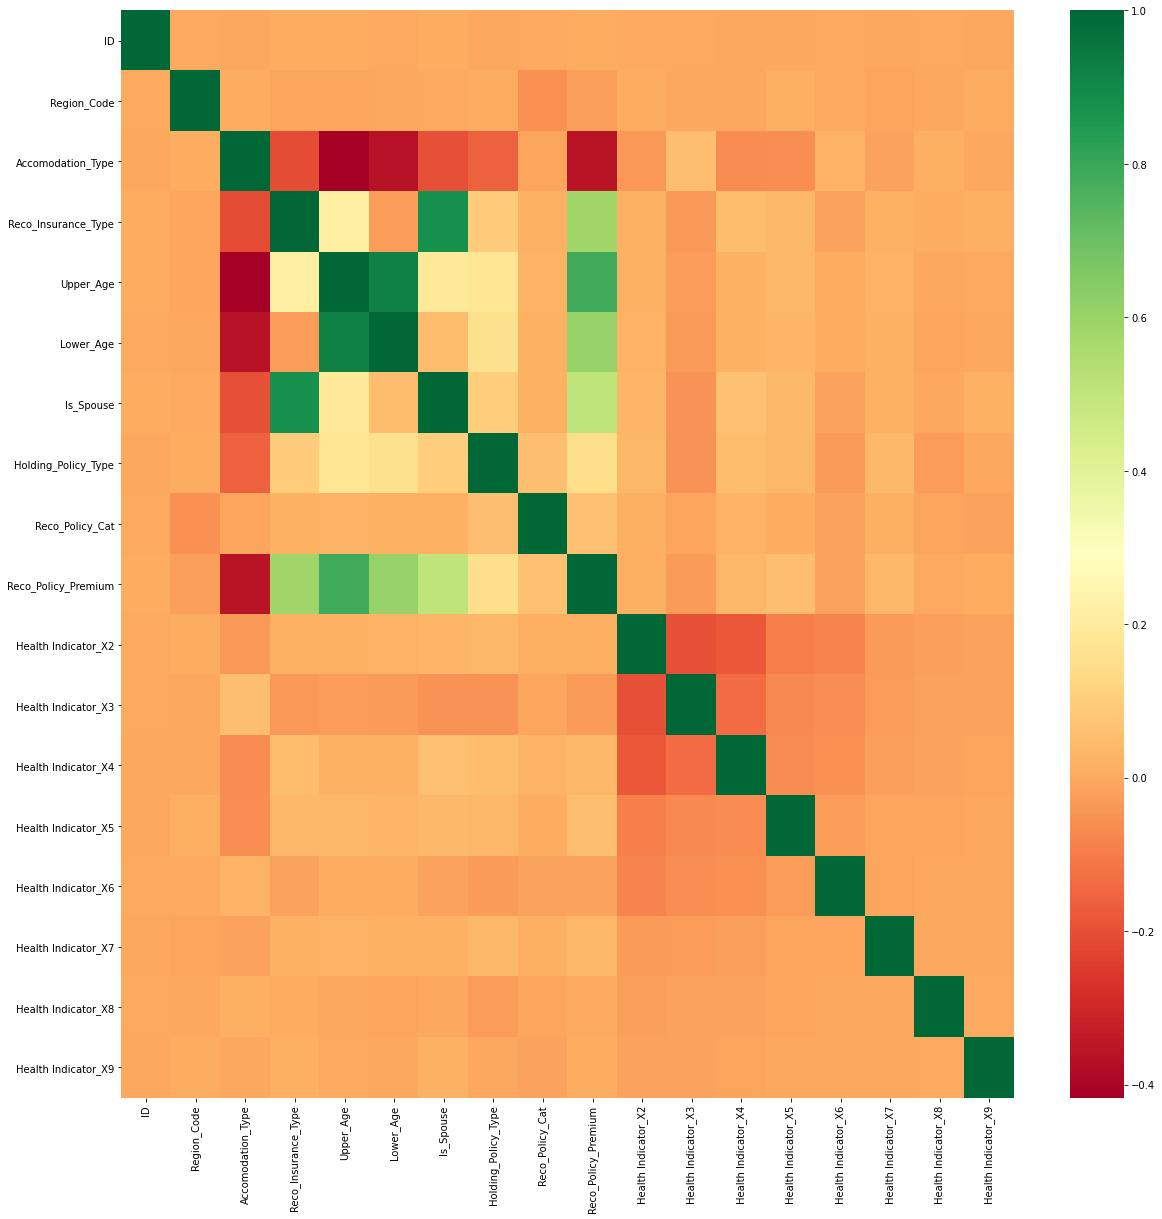

In [ ]:
plt.subplots(figsize=(20,20)) 
sns.heatmap(tdummydrop.corr(),cmap='RdYlGn')

In [ ]:
tdummydrop=pd.get_dummies(tdummydrop,columns=['Holding_Policy_Type'],drop_first=True)

In [ ]:
tdummydrop

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0
0,50883,156,0,0,30,30,0,5,11934.0,0,0,0,0,0,0,0,0,0,1,0
1,50884,7,0,1,69,68,1,18,32204.8,0,0,0,0,0,0,0,0,0,1,0
2,50885,564,1,0,28,28,0,17,9240.0,0,1,0,0,0,0,0,0,0,0,1
3,50886,1177,1,0,23,23,0,18,9086.0,0,1,0,0,0,0,0,0,0,1,0
4,50887,951,0,0,75,75,0,5,22534.0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,1044,0,0,45,45,0,18,15884.0,0,0,0,0,0,0,0,0,0,0,0
21801,72684,266,0,0,59,59,0,18,21390.0,0,0,0,1,0,0,0,0,0,1,0
21802,72685,2470,0,0,74,74,0,1,17836.0,0,1,0,0,0,0,0,0,1,0,0
21803,72686,1676,1,0,25,25,0,19,11568.0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Finding outliers and removing them

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


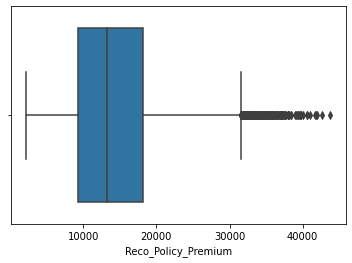

In [ ]:
sns.boxplot(tdummydrop['Reco_Policy_Premium'])

In [ ]:
tQ1=tdummydrop['Reco_Policy_Premium'].quantile(0.25)
tQ3=tdummydrop['Reco_Policy_Premium'].quantile(0.75)

In [ ]:
tIQR=tQ3-tQ1
tIQR

8916.599999999999

In [ ]:
tlowerlim=tQ1*1.5-tIQR
tupperlim=tQ3*1.5+tIQR

tlowerlim,tupperlim

(5010.9000000000015, 36219.0)

In [ ]:
tnoout=tdummydrop[(tdummydrop.Reco_Policy_Premium>tlowerlim)&(tdummydrop.Reco_Policy_Premium<tupperlim)]

In [ ]:
tnoout.shape

(48606, 20)

In [ ]:
tnoout.columns

Index(['Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age',
       'Lower_Age', 'Is_Spouse', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response', 'Health Indicator_X2', 'Health Indicator_X3',
       'Health Indicator_X4', 'Health Indicator_X5', 'Health Indicator_X6',
       'Health Indicator_X7', 'Health Indicator_X8', 'Health Indicator_X9',
       'Holding_Policy_Type_2.0', 'Holding_Policy_Type_3.0',
       'Holding_Policy_Type_4.0'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


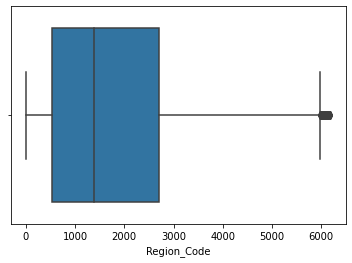

In [ ]:
sns.boxplot(tnoout['Region_Code'])

In [ ]:
tareaQ1=tdummydrop['Region_Code'].quantile(0.25)
tareaQ3=tdummydrop['Region_Code'].quantile(0.75)

In [ ]:
tareaIQR=tQ3-tQ1
tareaIQR

8916.599999999999

In [ ]:
tarealowerlim=tQ1*1.5-tIQR
tareaupperlim=tQ3*1.5+tIQR

tarealowerlim,tareaupperlim

(5010.9000000000015, 36219.0)

In [ ]:
tareaout=tnoout[(tnoout.Region_Code>tarealowerlim)&(tnoout.Region_Code<tareaupperlim)]

In [ ]:
tx=tdummydrop

In [ ]:
tx=tx.drop(['ID'],axis=1)

In [ ]:
#using xgboost model test data prediction
testadpredict=adb.predict(tx)

In [ ]:
testadpredict=pd.DataFrame(testadpredict)


In [ ]:
#Adding column names
ID=pd.DataFrame(tdummydrop["ID"])
testadpredict.columns=["Response"]

In [ ]:
#joining ID with predicted data
adaconcatinated=pd.concat([ID,testadpredict],axis=1)

In [ ]:
#Making it to file
adaconcatinated.to_csv("xgboost.csv")